<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [5]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [6]:
# Read in the data, create column for BTU conversion from flowrates
df = pd.read_csv('testing.csv')
df['BTU'] = df['Flow Rate'] * 2.117 * 1075
df = df.replace({np.nan: 'None'})

In [9]:
# Setting up filtering conditions
burner9k = df['Burner'] == '9.2K'
burner15k = df['Burner'] == '15K'
burner18k = df['Burner'] == '18K'
burner20k = df['Burner'] == '20K'

main = df['Main/Simmer'] == 'M'
simmer = df['Main/Simmer'] == 'S'
high = df['High/Low'] == 'H'
low = df['High/Low'] == 'L'

reg_lf = df['Regulator'] == 'LF'
reg_hf = df['Regulator'] == 'HF'
reg_lf_bp = df['Regulator'] == 'LF-BP'
reg_hf_bp = df['Regulator'] == 'HF-BP'
reg_none = df['Regulator'] == 'None'

orifice_lf = df['Orifices'] == 'LF'
orifice_hf = df['Orifices'] == 'HF'

lowpressure = df['Pressure'] == 5.0
highpressure = df['Pressure'] == 5.4

# Setting up data subsets
mainhigh = df[main & high]
mainlow = df[main & low]
simmerhigh = df[simmer & high]
simmerlow = df[simmer & low]

mainhigh9k = mainhigh[burner9k]
mainhigh15k = mainhigh[burner15k]
mainhigh18k = mainhigh[burner18k]
mainhigh20k = mainhigh[burner20k]

mainlow9k = mainlow[burner9k]
mainlow15k = mainlow[burner15k]
mainlow18k = mainlow[burner18k]
mainlow20k = mainlow[burner20k]

simmerhigh9k = simmerhigh[burner9k]
simmerhigh15k = simmerhigh[burner15k]
simmerhigh18k = simmerhigh[burner18k]
simmerhigh20k = simmerhigh[burner20k]

simmerlow9k = simmerlow[burner9k]
simmerlow15k = simmerlow[burner15k]
simmerlow18k = simmerlow[burner18k]
simmerlow20k = simmerlow[burner20k]

# Current (12/2020) final tester limits for each burner by line

gr9klim = {'mh-lwr':3.799, 'mh-upr':5.027,
           'ml-lwr':None, 'ml-upr':None,
           'sh-lwr':0.605, 'sh-upr':1.157,
           'sl-lwr':None, 'sl-upr':None}

gr15klim = {'mh-lwr':6.193, 'mh-upr':8.062,
            'ml-lwr':None, 'ml-upr':None,
            'sh-lwr':0.997, 'sh-upr':1.719,
            'sl-lwr':None, 'sl-upr':None}

srt9klim = {'mh-lwr':3.875, 'mh-upr':5.418,
            'ml-lwr':0.200, 'ml-upr':0.680,
            'sh-lwr':0.520, 'sh-upr':1.000,
            'sl-lwr':0.100, 'sl-upr':0.600}

srt15klim = {'mh-lwr':6.506, 'mh-upr':8.045,
             'ml-lwr':0.500, 'ml-upr':1.000,
             'sh-lwr':1.000, 'sh-upr':1.600,
             'sl-lwr':0.300, 'sl-upr':0.800}

srt18klim = {'mh-lwr':8.328, 'mh-upr':10.460,
             'ml-lwr':0.500, 'ml-upr':1.000,
             'sh-lwr':1.000, 'sh-upr':1.600,
             'sl-lwr':0.300, 'sl-upr':0.800}

srt20klim = {'mh-lwr':8.031, 'mh-upr':11.621,
             'ml-lwr':0.490, 'ml-upr':1.040,
             'sh-lwr':1.000, 'sh-upr':1.626,
             'sl-lwr':0.300, 'sl-upr':0.820}


### Comparing "best" and "worst" case scenarios: Low Pressure + Low Flow Orifices vs. High Pressure + High Flow Orifices
#### Note that because the data used to generate these figures has been filtered several times, sample size is small. Will need to collect more data before these figures can reliably predict flow patterns.

Start by counting the datapoints. We are plotting flowrates for main high setting, with separate plots for high and low pressure, with each plot broken up to show regulator configuration.

In [123]:
print('20k datapoints:')
print(mainhigh[burner20k & highpressure].groupby('Regulator')['Burner'].count())
print('\n')
print('18k datapoints:')
print(mainhigh[burner18k & highpressure].groupby('Regulator')['Burner'].count())
print('\n')
print('15k datapoints:')
print(mainhigh[burner15k & highpressure].groupby('Regulator')['Burner'].count())
print('\n')
print('9.2k datapoints:')
print(mainhigh[burner9k & highpressure].groupby('Regulator')['Burner'].count())

20k datapoints:
Regulator
HF       9
HF-BP    6
LF-BP    3
None     6
Name: Burner, dtype: int64


18k datapoints:
Regulator
HF       18
HF-BP    12
LF-BP     6
None     12
Name: Burner, dtype: int64


15k datapoints:
Regulator
HF       18
HF-BP    12
LF-BP     6
None     12
Name: Burner, dtype: int64


9.2k datapoints:
Regulator
HF       9
HF-BP    6
LF-BP    3
None     6
Name: Burner, dtype: int64


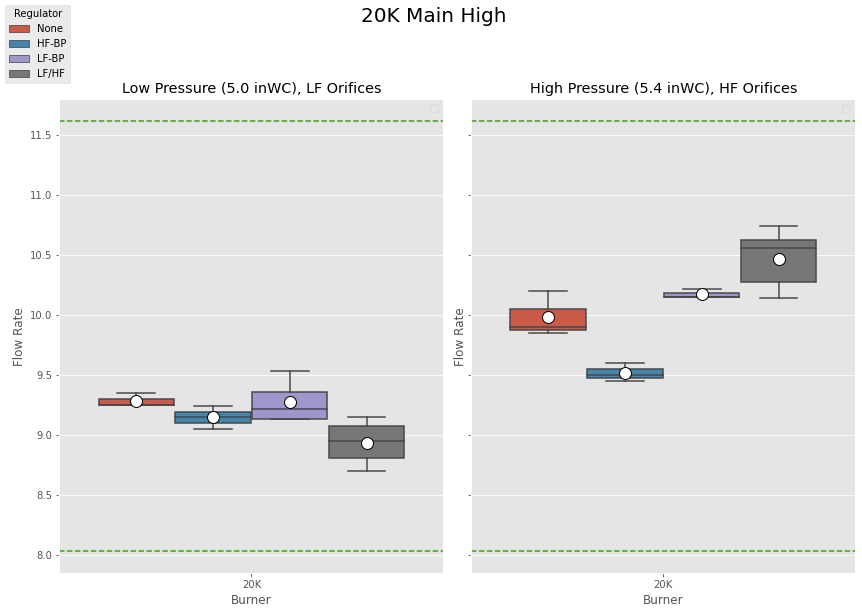

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), sharey=True)
fig.suptitle('20K Main High', y=1.06, fontsize=20)

sns.boxplot(ax=axes[0], 
            x = mainhigh[burner20k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure & orifice_lf], 
            hue = 'Regulator', 
            hue_order = ['None','HF-BP','LF-BP', 'LF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})
sns.boxplot(ax=axes[1], 
            x = mainhigh[burner20k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure & orifice_hf], 
            hue = 'Regulator',
            hue_order = ['None','HF-BP','LF-BP', 'HF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})

lines, labels = fig.axes[-1].get_legend_handles_labels()
labels[3] = 'LF/HF'
axes[0].legend(lines[:0], labels[:0])
axes[1].legend(lines[:0], labels[:0])
axes[0].set_title('Low Pressure (5.0 inWC), LF Orifices')
axes[1].set_title('High Pressure (5.4 inWC), HF Orifices')

axes[0].axhline(y=srt20klim['mh-lwr'], ls='--', c='#3c9e12')
axes[0].axhline(y=srt20klim['mh-upr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt20klim['mh-lwr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt20klim['mh-upr'], ls='--', c='#3c9e12')

fig.legend(lines, labels, loc='upper left', title='Regulator')
#plt.savefig('plot-20k-pressurecomparison-regulator.png')
plt.tight_layout()
plt.show()

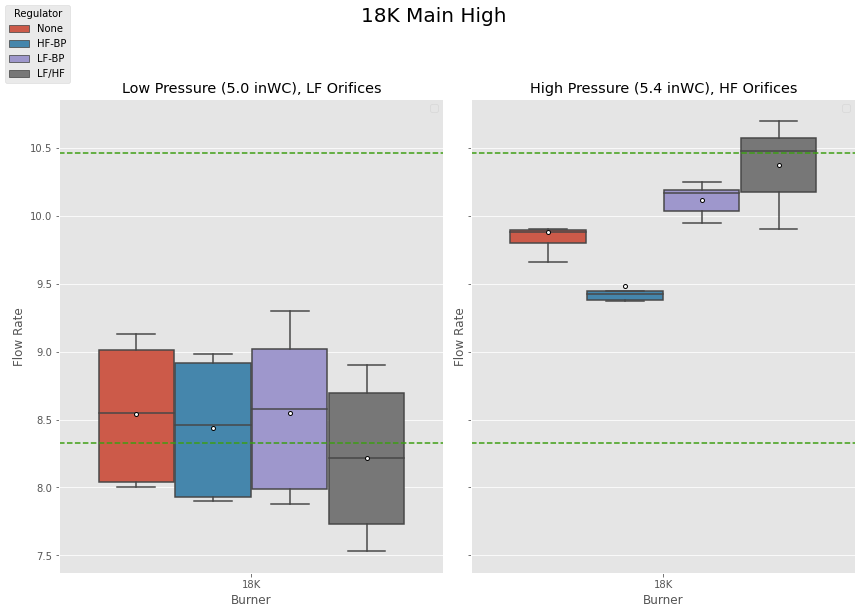

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), sharey=True)
fig.suptitle('18K Main High', y=1.06, fontsize=20)

sns.boxplot(ax=axes[0], 
            x = mainhigh[burner18k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure & orifice_lf], 
            hue = 'Regulator', 
            hue_order = ['None','HF-BP','LF-BP', 'LF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})
sns.boxplot(ax=axes[1], 
            x = mainhigh[burner18k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure & orifice_hf], 
            hue = 'Regulator',
            hue_order = ['None','HF-BP','LF-BP', 'HF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})

lines, labels = fig.axes[-1].get_legend_handles_labels()
labels[3] = 'LF/HF'
axes[0].legend(lines[:0], labels[:0])
axes[1].legend(lines[:0], labels[:0])
axes[0].set_title('Low Pressure (5.0 inWC), LF Orifices')
axes[1].set_title('High Pressure (5.4 inWC), HF Orifices')

axes[0].axhline(y=srt18klim['mh-lwr'], ls='--', c='#3c9e12')
axes[0].axhline(y=srt18klim['mh-upr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt18klim['mh-lwr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt18klim['mh-upr'], ls='--', c='#3c9e12')

fig.legend(lines, labels, loc='upper left', title='Regulator')
plt.tight_layout()
#plt.savefig('plot-20k-pressurecomparison-regulator.png')
plt.show()

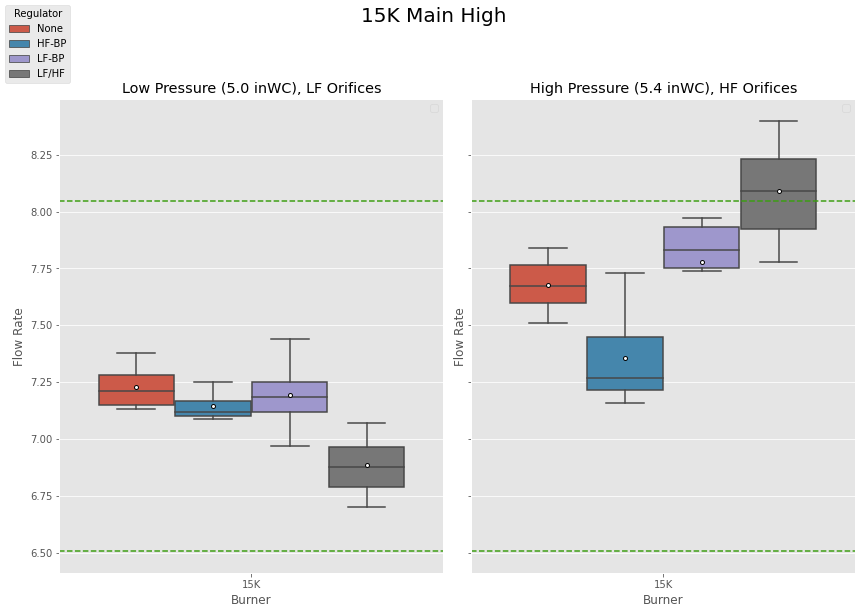

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), sharey=True)
fig.suptitle('15K Main High', y=1.06, fontsize=20)

sns.boxplot(ax=axes[0], 
            x = mainhigh[burner15k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure & orifice_lf], 
            hue = 'Regulator', 
            hue_order = ['None','HF-BP','LF-BP', 'LF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})
sns.boxplot(ax=axes[1], 
            x = mainhigh[burner15k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure & orifice_hf], 
            hue = 'Regulator',
            hue_order = ['None','HF-BP','LF-BP', 'HF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})

lines, labels = fig.axes[-1].get_legend_handles_labels()
labels[3] = 'LF/HF'
axes[0].legend(lines[:0], labels[:0])
axes[1].legend(lines[:0], labels[:0])
axes[0].set_title('Low Pressure (5.0 inWC), LF Orifices')
axes[1].set_title('High Pressure (5.4 inWC), HF Orifices')

axes[0].axhline(y=srt15klim['mh-lwr'], ls='--', c='#3c9e12')
axes[0].axhline(y=srt15klim['mh-upr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt15klim['mh-lwr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt15klim['mh-upr'], ls='--', c='#3c9e12')

fig.legend(lines, labels, loc='upper left', title='Regulator')
plt.tight_layout()
#plt.savefig('plot-20k-pressurecomparison-regulator.png')
plt.show()

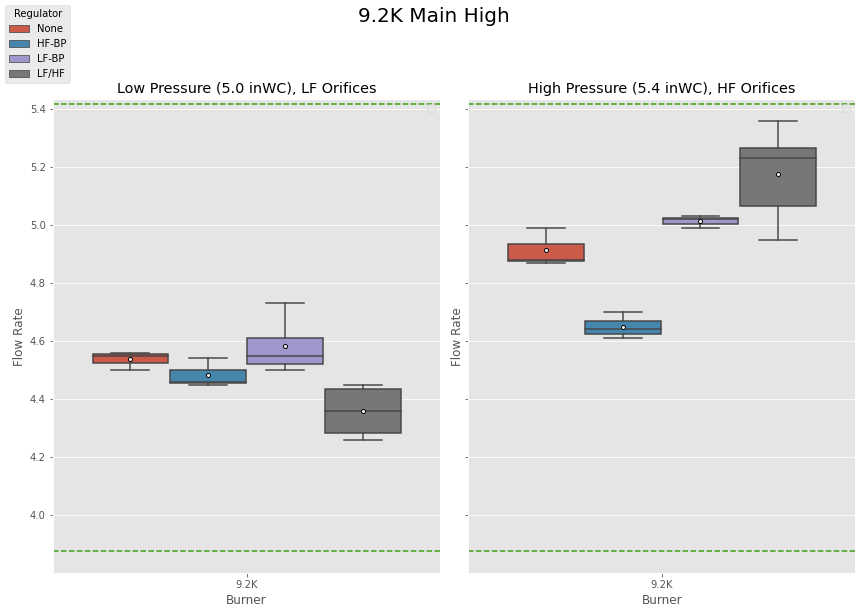

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), sharey=True)
fig.suptitle('9.2K Main High', y=1.06, fontsize=20)

sns.boxplot(ax=axes[0], 
            x = mainhigh[burner9k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure & orifice_lf], 
            hue = 'Regulator', 
            hue_order = ['None','HF-BP','LF-BP', 'LF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})
sns.boxplot(ax=axes[1], 
            x = mainhigh[burner9k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure & orifice_hf], 
            hue = 'Regulator',
            hue_order = ['None','HF-BP','LF-BP', 'HF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})

lines, labels = fig.axes[-1].get_legend_handles_labels()
labels[3] = 'LF/HF'
axes[0].legend(lines[:0], labels[:0])
axes[1].legend(lines[:0], labels[:0])
axes[0].set_title('Low Pressure (5.0 inWC), LF Orifices')
axes[1].set_title('High Pressure (5.4 inWC), HF Orifices')

axes[0].axhline(y=srt9klim['mh-lwr'], ls='--', c='#3c9e12')
axes[0].axhline(y=srt9klim['mh-upr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt9klim['mh-lwr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt9klim['mh-upr'], ls='--', c='#3c9e12')

fig.legend(lines, labels, loc='upper left', title='Regulator')
plt.tight_layout()
#plt.savefig('plot-20k-pressurecomparison-regulator.png')
plt.show()

In [11]:
def boxplotburnergrid(df, col=None, title=''):
    """Generates a 4x4 boxplot of flow rates by burner with a hue

    Args:
        df (dataframe): the dataframe to use
        col (str): the column name to set as hue
        title (str): main high, main low, simmer high, simmer low

    """
    fig, axes = plt.subplots(2, 2, figsize=(12,12))
    fig.suptitle('Effect of ' + col + ' configuration on flow rate by burner\n' + '(' + title + ')', y=.94, fontsize=20)

    sns.boxplot(ax=axes[0,0], 
                x = df[burner9k]['Burner'], y = 'Flow Rate', data = df, hue = col,
                showmeans=True,
                meanprops={ "marker":"o",
                            "markerfacecolor":"white",
                            "markeredgecolor":"black",
                            "markersize":"10" })
    sns.boxplot(ax=axes[0,1], 
                x = df[burner15k]['Burner'], y = 'Flow Rate', data = df, hue = col,
                showmeans=True,
                meanprops={ "marker":"o",
                            "markerfacecolor":"white",
                            "markeredgecolor":"black",
                            "markersize":"10" })
    sns.boxplot(ax=axes[1,0], 
                x = df[burner18k]['Burner'], y = 'Flow Rate', data = df, hue = col,
                showmeans=True,
                meanprops={ "marker":"o",
                            "markerfacecolor":"white",
                            "markeredgecolor":"black",
                            "markersize":"10" })
    sns.boxplot(ax=axes[1,1], 
                x = df[burner20k]['Burner'], y = 'Flow Rate', data = df, hue = col,
                showmeans=True,
                meanprops={ "marker":"o",
                            "markerfacecolor":"white",
                            "markeredgecolor":"black",
                            "markersize":"10" })

    lines, labels = fig.axes[-1].get_legend_handles_labels()
    axes[0,0].legend(lines[:0], labels[:0])
    axes[0,1].legend(lines[:0], labels[:0])
    axes[1,0].legend(lines[:0], labels[:0])
    axes[1,1].legend(lines[:0], labels[:0])

    axes[0,0].axhline(y=srt9klim['mh-lwr'], c='#3c9e12')
    axes[0,0].axhline(y=srt9klim['mh-upr'], c='#3c9e12')
    axes[0,1].axhline(y=srt15klim['mh-lwr'], c='#3c9e12')
    axes[0,1].axhline(y=srt15klim['mh-upr'], c='#3c9e12')
    axes[1,0].axhline(y=srt18klim['mh-lwr'], c='#3c9e12')
    axes[1,0].axhline(y=srt18klim['mh-upr'], c='#3c9e12')
    axes[1,1].axhline(y=srt20klim['mh-lwr'], c='#3c9e12')
    axes[1,1].axhline(y=srt20klim['mh-upr'], c='#3c9e12')

    fig.legend(lines, labels, loc = 'center right')

    #plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

    plt.show()

## Generating boxplot grids
#### These plots break out flow rates for each burner and separate them based on regulator configuration. Each individual boxplot will have flow values taken at high and low pressure, as well as high and low orifice configurations.

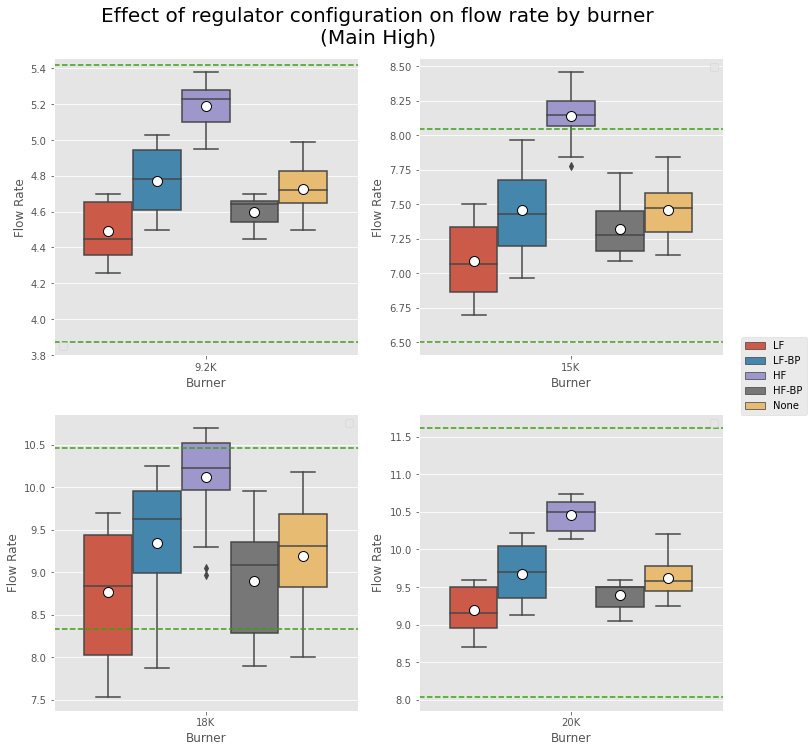

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of regulator configuration on flow rate by burner\n' + '(Main High)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = mainhigh[burner9k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[0,1], 
            x = mainhigh[burner15k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,0], 
            x = mainhigh[burner18k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,1], 
            x = mainhigh[burner20k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['mh-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()

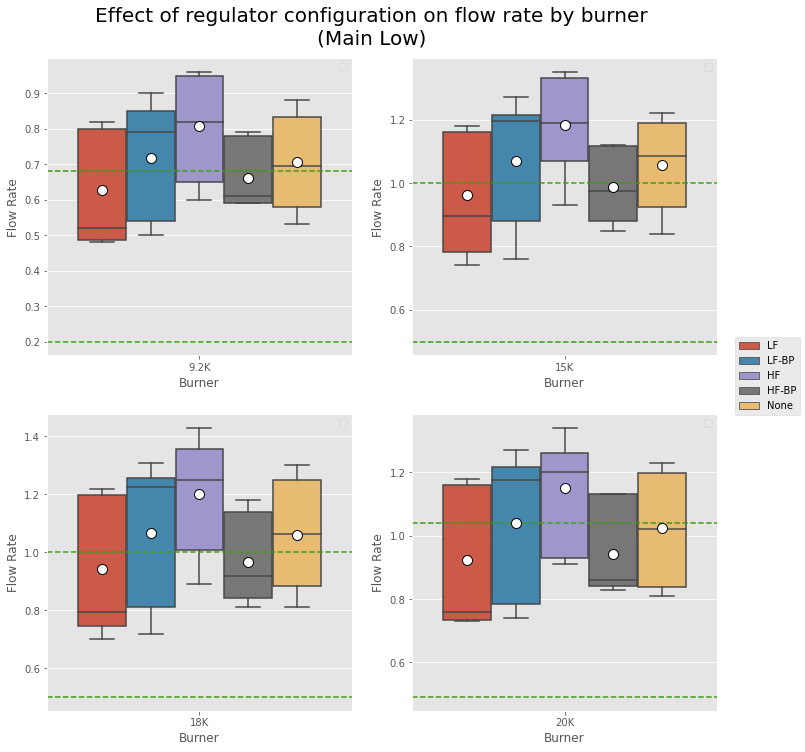

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of regulator configuration on flow rate by burner\n' + '(Main Low)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = mainlow[burner9k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[0,1], 
            x = mainlow[burner15k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,0], 
            x = mainlow[burner18k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,1], 
            x = mainlow[burner20k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['ml-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['ml-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['ml-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['ml-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['ml-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['ml-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['ml-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['ml-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()


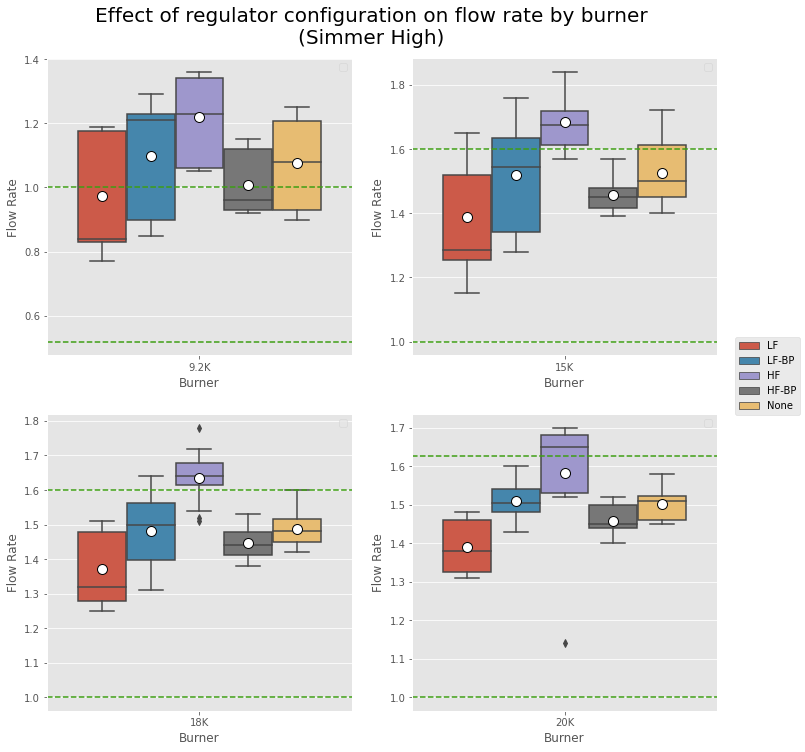

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of regulator configuration on flow rate by burner\n' + '(Simmer High)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = simmerhigh[burner9k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[0,1], 
            x = simmerhigh[burner15k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,0], 
            x = simmerhigh[burner18k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,1], 
            x = simmerhigh[burner20k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['sh-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['sh-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sh-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sh-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sh-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sh-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sh-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sh-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()


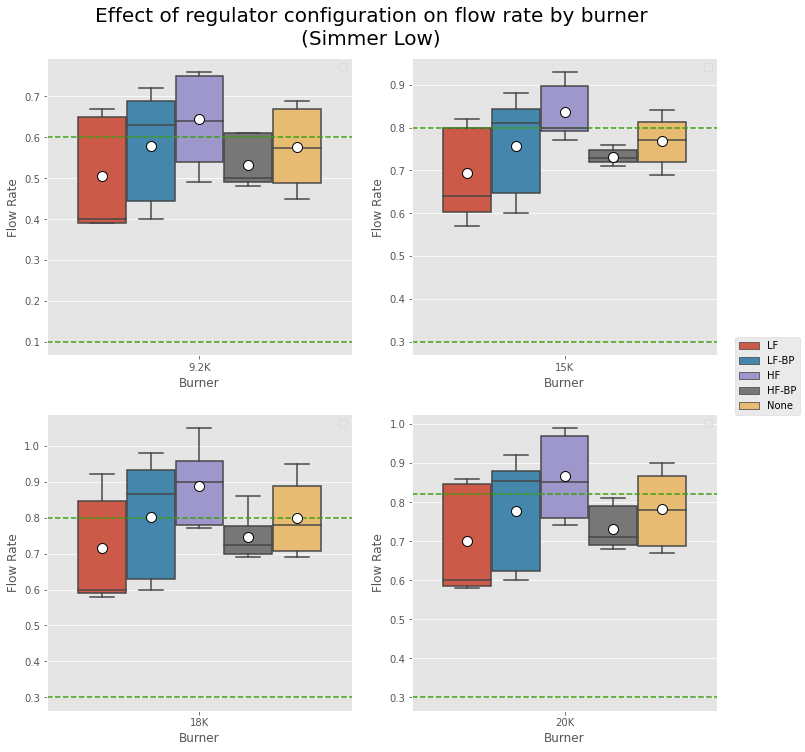

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of regulator configuration on flow rate by burner\n' + '(Simmer Low)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = simmerlow[burner9k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[0,1], 
            x = simmerlow[burner15k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,0], 
            x = simmerlow[burner18k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,1], 
            x = simmerlow[burner20k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['sl-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['sl-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sl-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sl-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sl-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sl-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sl-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sl-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()



### These plots break out flow rates for each burner, separated based on orifice configuration. Each boxplot will have flow rate data from all possible regulator and pressure configurations.

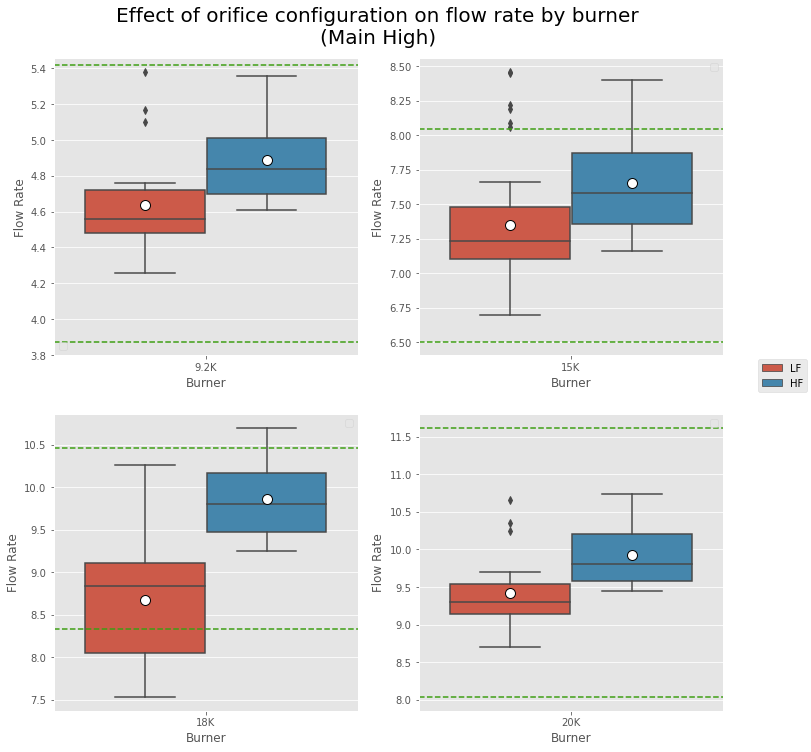

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of orifice configuration on flow rate by burner\n' + '(Main High)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = mainhigh[burner9k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[0,1], 
            x = mainhigh[burner15k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,0], 
            x = mainhigh[burner18k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,1], 
            x = mainhigh[burner20k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['mh-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()



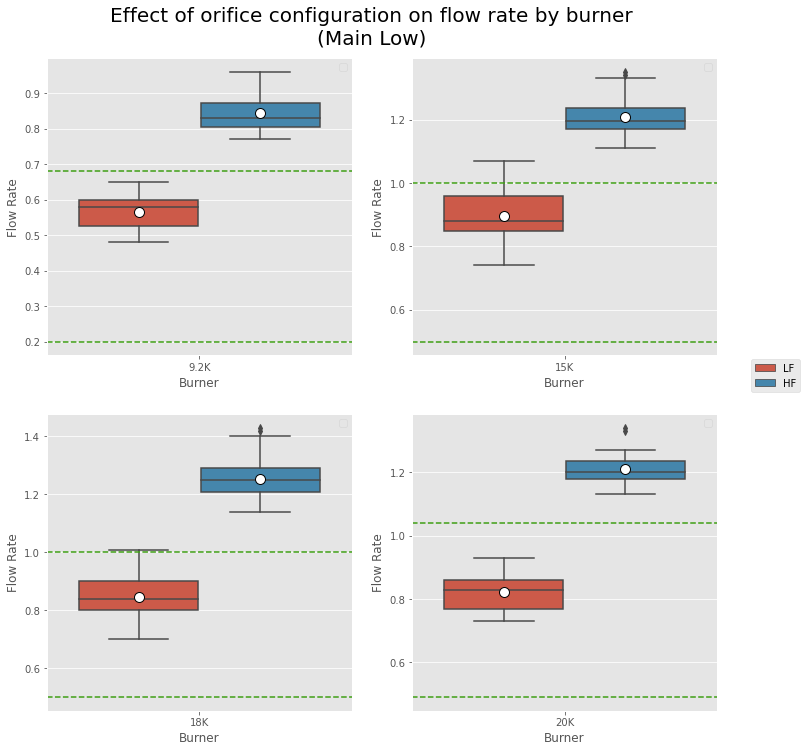

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of orifice configuration on flow rate by burner\n' + '(Main Low)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = mainlow[burner9k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[0,1], 
            x = mainlow[burner15k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,0], 
            x = mainlow[burner18k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,1], 
            x = mainlow[burner20k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['ml-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['ml-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['ml-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['ml-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['ml-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['ml-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['ml-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['ml-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()




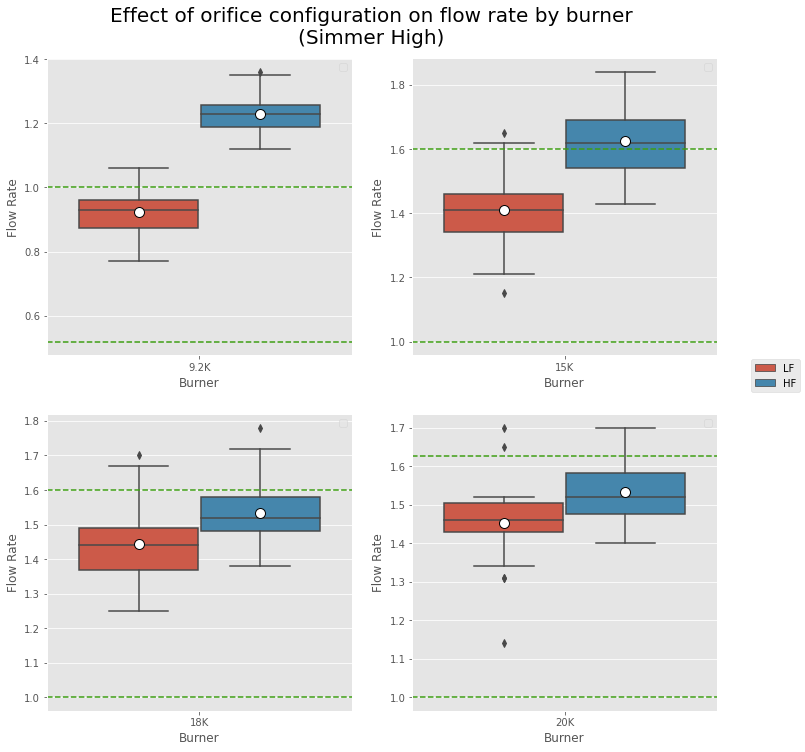

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of orifice configuration on flow rate by burner\n' + '(Simmer High)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = simmerhigh[burner9k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[0,1], 
            x = simmerhigh[burner15k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,0], 
            x = simmerhigh[burner18k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,1], 
            x = simmerhigh[burner20k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['sh-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['sh-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sh-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sh-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sh-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sh-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sh-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sh-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()



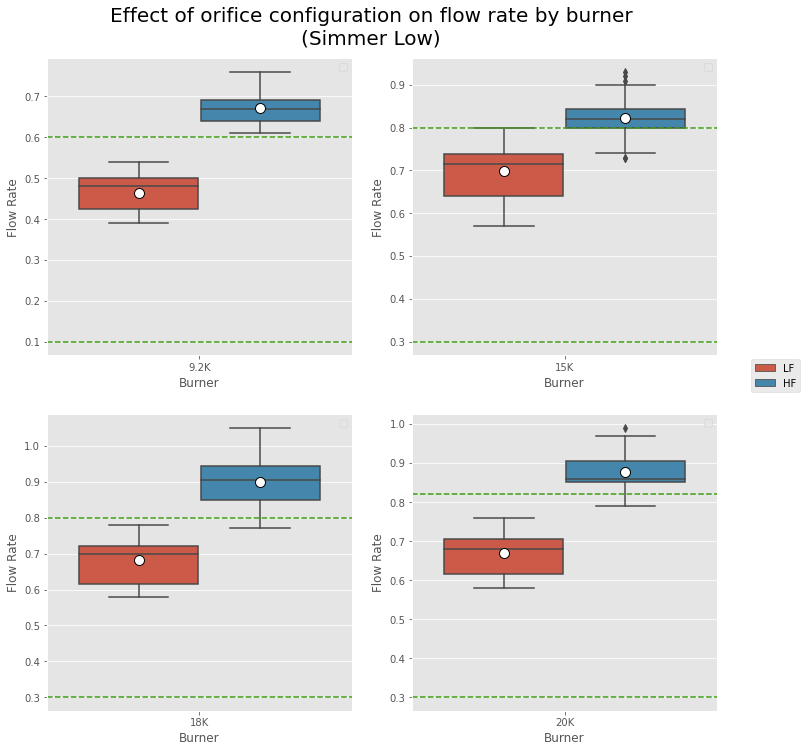

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of orifice configuration on flow rate by burner\n' + '(Simmer Low)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = simmerlow[burner9k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[0,1], 
            x = simmerlow[burner15k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,0], 
            x = simmerlow[burner18k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })
sns.boxplot(ax=axes[1,1], 
            x = simmerlow[burner20k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['sl-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['sl-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sl-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sl-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sl-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sl-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sl-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sl-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()




## Controlling for pressure

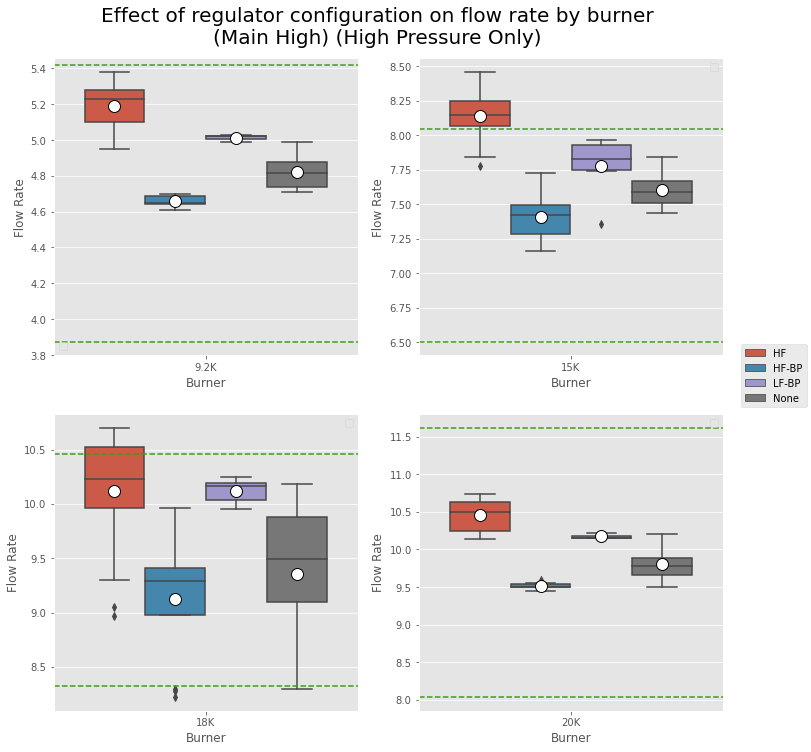

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of regulator configuration on flow rate by burner\n' + '(Main High) (High Pressure Only)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], x = mainhigh[burner9k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"12"})
sns.boxplot(ax=axes[0,1], 
            x = mainhigh[burner15k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"12"})
sns.boxplot(ax=axes[1,0], 
            x = mainhigh[burner18k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"12"})
sns.boxplot(ax=axes[1,1], 
            x = mainhigh[burner20k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"12"})

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['mh-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-burner-highpressure-regulator.png')
plt.show()

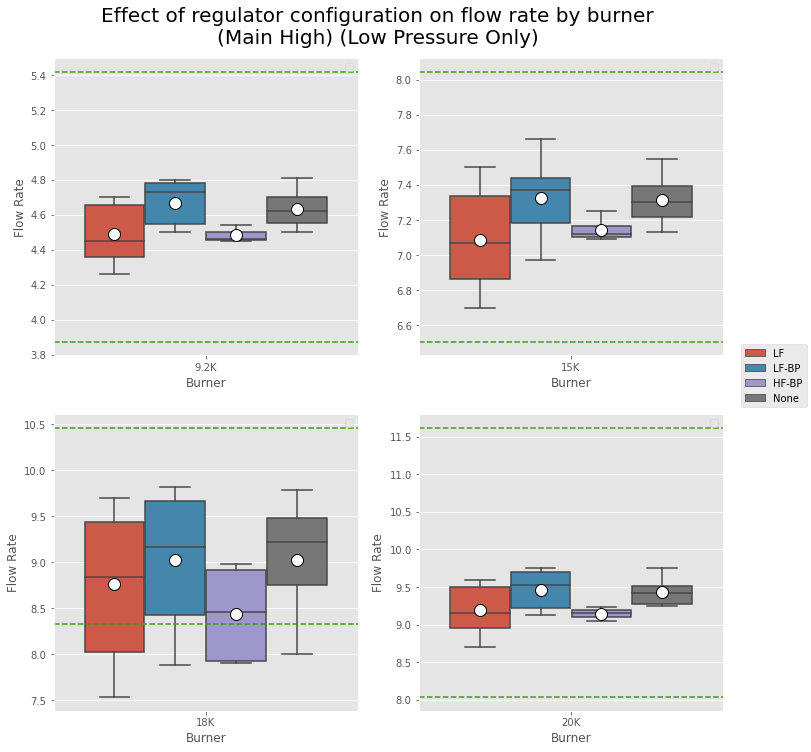

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of regulator configuration on flow rate by burner\n' + '(Main High) (Low Pressure Only)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = mainhigh[burner9k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"12"})
sns.boxplot(ax=axes[0,1], 
            x = mainhigh[burner15k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"12"})
sns.boxplot(ax=axes[1,0], 
            x = mainhigh[burner18k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"12"})
sns.boxplot(ax=axes[1,1], 
            x = mainhigh[burner20k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"12"})

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['mh-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-burner-lowpressure-regulator.png')
plt.show()

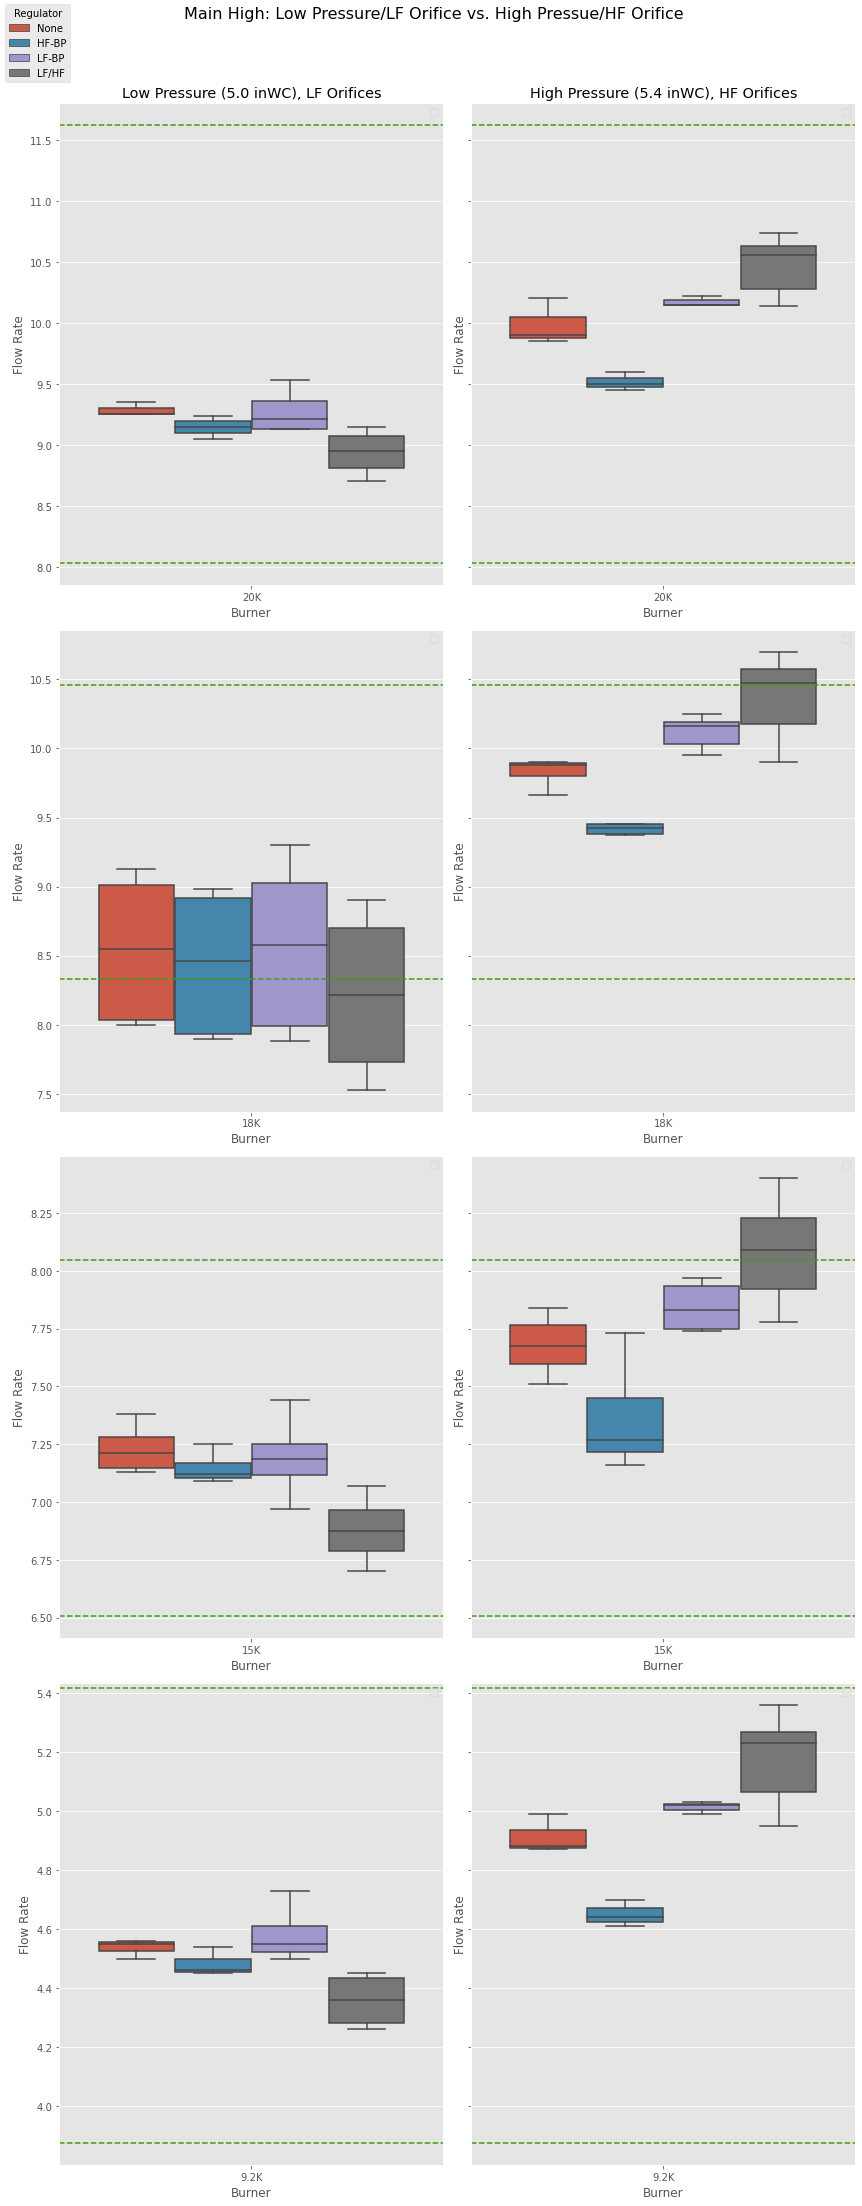

In [100]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharey='row', sharex='row', figsize=(12,30))
fig.suptitle('Main High: Low Pressure/LF Orifice vs. High Pressue/HF Orifice', y=1.02, fontsize=16)

sns.boxplot(ax=axes[0,0], 
            x = mainhigh[burner20k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure & orifice_lf], 
            hue = 'Regulator', 
            hue_order = ['None','HF-BP','LF-BP', 'LF'],
            showfliers=False)
sns.boxplot(ax=axes[0,1], 
            x = mainhigh[burner20k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure & orifice_hf], 
            hue = 'Regulator',
            hue_order = ['None','HF-BP','LF-BP', 'HF'],
            showfliers=False)
sns.boxplot(ax=axes[1,0], 
            x = mainhigh[burner18k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure & orifice_lf], 
            hue = 'Regulator', 
            hue_order = ['None','HF-BP','LF-BP', 'LF'],
            showfliers=False)
sns.boxplot(ax=axes[1,1], 
            x = mainhigh[burner18k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure & orifice_hf], 
            hue = 'Regulator',
            hue_order = ['None','HF-BP','LF-BP', 'HF'],
            showfliers=False)
sns.boxplot(ax=axes[2,0], 
            x = mainhigh[burner15k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure & orifice_lf], 
            hue = 'Regulator', 
            hue_order = ['None','HF-BP','LF-BP', 'LF'],
            showfliers=False)
sns.boxplot(ax=axes[2,1], 
            x = mainhigh[burner15k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure & orifice_hf], 
            hue = 'Regulator',
            hue_order = ['None','HF-BP','LF-BP', 'HF'],
            showfliers=False)
sns.boxplot(ax=axes[3,0], 
            x = mainhigh[burner9k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure & orifice_lf], 
            hue = 'Regulator', 
            hue_order = ['None','HF-BP','LF-BP', 'LF'],
            showfliers=False)
sns.boxplot(ax=axes[3,1], 
            x = mainhigh[burner9k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure & orifice_hf], 
            hue = 'Regulator',
            hue_order = ['None','HF-BP','LF-BP', 'HF'],
            showfliers=False)

axes[0,0].set_title('Low Pressure (5.0 inWC), LF Orifices')
axes[0,1].set_title('High Pressure (5.4 inWC), HF Orifices')

axes[0,0].axhline(y=srt20klim['mh-lwr'], ls='--', c='#3c9e12')
axes[0,0].axhline(y=srt20klim['mh-upr'], ls='--', c='#3c9e12')
axes[0,1].axhline(y=srt20klim['mh-lwr'], ls='--', c='#3c9e12')
axes[0,1].axhline(y=srt20klim['mh-upr'], ls='--', c='#3c9e12')

axes[1,0].axhline(y=srt18klim['mh-lwr'], ls='--', c='#3c9e12')
axes[1,0].axhline(y=srt18klim['mh-upr'], ls='--', c='#3c9e12')
axes[1,1].axhline(y=srt18klim['mh-lwr'], ls='--', c='#3c9e12')
axes[1,1].axhline(y=srt18klim['mh-upr'], ls='--', c='#3c9e12')

axes[2,0].axhline(y=srt15klim['mh-lwr'], ls='--', c='#3c9e12')
axes[2,0].axhline(y=srt15klim['mh-upr'], ls='--', c='#3c9e12')
axes[2,1].axhline(y=srt15klim['mh-lwr'], ls='--', c='#3c9e12')
axes[2,1].axhline(y=srt15klim['mh-upr'], ls='--', c='#3c9e12')

axes[3,0].axhline(y=srt9klim['mh-lwr'], ls='--', c='#3c9e12')
axes[3,0].axhline(y=srt9klim['mh-upr'], ls='--', c='#3c9e12')
axes[3,1].axhline(y=srt9klim['mh-lwr'], ls='--', c='#3c9e12')
axes[3,1].axhline(y=srt9klim['mh-upr'], ls='--', c='#3c9e12')

plt.tight_layout()

lines, labels = fig.axes[-1].get_legend_handles_labels()
labels[3] = 'LF/HF'
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])
axes[2,0].legend(lines[:0], labels[:0])
axes[2,1].legend(lines[:0], labels[:0])
axes[3,0].legend(lines[:0], labels[:0])
axes[3,1].legend(lines[:0], labels[:0])

fig.legend(lines, labels, loc = 'upper left', title='Regulator')